In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from scipy.stats import linregress

import sys
sys.path.append("/home/z5297792/UNSW-MRes/MRes/modules") 
from utils import dopioe, compute_tilt_data, bearing, ellipse_aspect_ratio, phys_grad, compute_core_mean

df_eddies = pd.read_pickle('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/df_eddies_processed_1462_10650.pkl')


In [2]:
import netCDF4 as nc
from scipy.interpolate import griddata
import netCDF4 as nc
from scipy.interpolate import RegularGridInterpolator

# Field Data
fname = f'/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho = np.transpose(dataset.variables['lon_rho'], axes=(1, 0))
lat_rho = np.transpose(dataset.variables['lat_rho'], axes=(1, 0))
mask_rho = np.transpose(dataset.variables['mask_rho'], axes=(1, 0))
h = np.transpose(dataset.variables['h'], axes=(1, 0))
# f = np.transpose(dataset.variables['f'], axes=(1, 0))
angle = dataset.variables['angle'][0, 0]
z_r = np.load('/srv/scratch/z5297792/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
def distance(lat1, lon1, lat2, lon2):
    EARTH_RADIUS = 6357
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return EARTH_RADIUS * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
j_mid = lon_rho.shape[1] // 2
i_mid = lon_rho.shape[0] // 2
dx = distance(lat_rho[:-1, j_mid], lon_rho[:-1, j_mid],
              lat_rho[1:, j_mid], lon_rho[1:, j_mid])
dy = distance(lat_rho[i_mid, :-1], lon_rho[i_mid, :-1],
              lat_rho[i_mid, 1:], lon_rho[i_mid, 1:])
x_grid = np.insert(np.cumsum(dx), 0, 0)
y_grid = np.insert(np.cumsum(dy), 0, 0)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid, indexing='ij')


In [3]:
df_tilt_data = pd.read_pickle("/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/Vertical_Eddy_Dataset/df_tilt_data.pkl")
df_eddies = df_eddies.merge(
    df_tilt_data[['Eddy', 'Day', 'TiltDis', 'TiltDir']],
    how='left',
    left_on=['Eddy', 'Day'],
    right_on=['Eddy', 'Day']
)
df_eddies


,Eddy,Day,Cyc,Lon,Lat,ic,jc,xc,yc,w,...,q22,Rc,psi0,A,R,Age,Date,fname,TiltDis,TiltDir
0,1,1462,CE,156.969773,-28.461100,179,274,505.897600,1353.012251,-0.000033,...,0.943344,104.677927,71.391686,-0.006515,69.250036,57,1994-01-02,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
1,1,1463,CE,156.993096,-28.433992,179,275,507.149717,1356.633687,-0.000030,...,0.950849,110.542281,77.351002,-0.006330,62.000626,57,1994-01-03,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
2,1,1464,CE,157.097940,-28.381485,181,276,515.130000,1365.650728,-0.000028,...,1.006892,115.245476,75.250400,-0.005666,67.000485,57,1994-01-04,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
3,1,1465,CE,157.094334,-28.315658,181,278,512.570772,1372.426342,-0.000033,...,1.200119,114.738549,72.789618,-0.005529,66.501582,57,1994-01-05,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,31.669332,89.546110
4,1,1466,CE,157.106324,-28.346479,181,277,514.728351,1369.599726,-0.000029,...,1.214160,100.425496,58.705551,-0.005821,56.251116,57,1994-01-06,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,33.600109,92.955602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105233,2631,10646,AE,157.825620,-37.030656,248,97,850.502045,476.447416,0.000013,...,1.156400,114.894173,-41.491437,0.003143,72.751791,24,2019-02-24,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,12.848125,334.097803
105234,2631,10647,AE,157.880796,-36.972725,249,98,853.608024,484.316677,0.000014,...,1.238286,111.853372,-42.195517,0.003373,73.000933,24,2019-02-25,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,13.627106,324.784689
105235,2631,10648,AE,157.868516,-36.874363,248,100,849.759258,494.400614,0.000014,...,1.163994,107.180060,-43.102690,0.003752,75.750780,24,2019-02-26,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN
105236,2631,10649,AE,157.753058,-36.882303,246,99,840.037603,489.981707,0.000013,...,1.203104,100.368133,-37.967048,0.003769,75.750006,24,2019-02-27,/srv/scratch/z3533156/26year_BRAN2020/outer_av...,NaN,NaN


In [4]:
g = df_eddies.groupby('Eddy', sort=False)
df_eddies['diff_TDis'] = g['TiltDis'].diff()
d = g['TiltDir'].diff()
df_eddies['diff_TDir'] = ((d + 180) % 360) - 180


In [5]:
# Batheymetry averaged about the core
h = np.transpose(dataset.variables['h'], axes=(1, 0))
df_eddies = compute_core_mean(
    df_eddies,
    X_grid, Y_grid,
    mask_rho,
    fixed_field=h,
    colname="h"
)
# df_eddies['h'] = h[df_eddies.ic, df_eddies.jc]

# Coriolis
f = np.transpose(dataset.variables['f'], axes=(1, 0))
df_eddies['f'] = f[df_eddies.ic, df_eddies.jc]

# Slope Magnitude
dhdx, dhdy = phys_grad(h, X_grid*1e3, Y_grid*1e3, mask_rho)
s = np.hypot(dhdx, dhdy)
df_eddies['s'] = s[df_eddies.ic, df_eddies.jc]

# topographic gradient
dh_dN = - (np.sin(angle) * dhdx + np.cos(angle) * dhdy)
dh_dE = - (np.cos(angle) * dhdx - np.sin(angle) * dhdy)

# planetary gradient
f = np.transpose(dataset.variables['f'], axes=(1, 0))
dfdx, dfdy = phys_grad(f, X_grid*1e3, Y_grid*1e3, mask_rho)
df_dN = - (np.sin(angle) * dfdx + np.cos(angle) * dfdy)
df_dE = - (np.cos(angle) * dfdx - np.sin(angle) * dfdy)

# beta
df_eddies['beta'] = df_dN[df_eddies.ic, df_eddies.jc]
beta = df_dN

# planetary beta
df_eddies['plan_beta'] = df_dN[df_eddies.ic, df_eddies.jc] / df_eddies.h.values
plan_beta = df_dN / h

# topographic beta
df_eddies['topo_beta'] = - df_eddies.f / df_eddies.h * dh_dN[df_eddies.ic, df_eddies.jc]
topo_beta = -f / h * dh_dN


/home/z5297792/myenv310/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


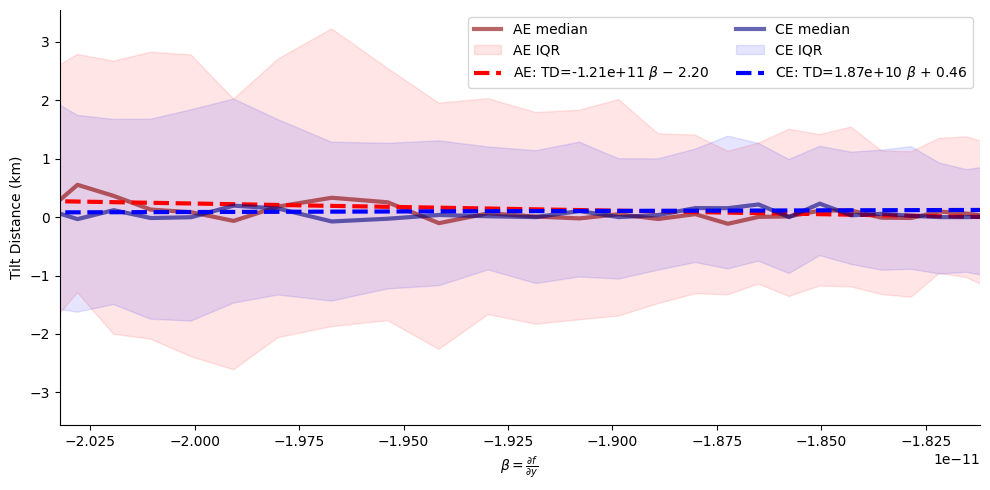

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

styles = {
    'AE': {'line': 'darkred',  'fill': 'red'},
    'CE': {'line': 'navy',     'fill': 'blue'}
}

# ------------------------------------------------------------
# Build quantile-based bins using ALL 
# ------------------------------------------------------------
df_all = df_eddies.copy()
df_all = df_all.dropna(subset=['beta'])

# x_min, x_max = .36e-14, 1.5e-14  # <-- set your limits 
x_min, x_max = df_all.beta.min(), df_all.beta.max()  # <-- set your limits 

mask_cap = (df_all.beta >= x_min) & (df_all.beta <= x_max)
N_all = df_all[mask_cap].beta.values

nbins = 30
bins = np.quantile(N_all, np.linspace(0, 1, nbins + 1))
bins = np.unique(bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# ------------------------------------------------------------
# MAIN PLOT
# ------------------------------------------------------------
for cyc in ['AE', 'CE']:

    df_masked = df_eddies[df_eddies.Cyc == cyc].copy()
    df_masked = df_masked.dropna(subset=['beta', 'diff_TDis'])

    xval = df_masked['beta'].values
    tilt = df_masked['diff_TDis'].values

    # ------------------------------------------------------------
    # CAP THE DATA
    # ------------------------------------------------------------
    mask_cap = (xval >= x_min) & (xval <= x_max)
    xval = xval[mask_cap]
    tilt = tilt[mask_cap]

    # bin everything — no masking beyond the cap
    digitized = np.digitize(xval, bins)

    median = [np.nanmedian(tilt[digitized == i]) for i in range(1, len(bins))]
    q25    = [np.nanquantile(tilt[digitized == i], .25) for i in range(1, len(bins))]
    q75    = [np.nanquantile(tilt[digitized == i], .75) for i in range(1, len(bins))]

    # ax.scatter(xval, tilt, s=1, alpha=0.08, marker='.',
    #            color=styles[cyc]['fill'])

    ax.plot(bin_centers, median, lw=3, color=styles[cyc]['line'],
            alpha=.6, label=f'{cyc} median')

    ax.fill_between(bin_centers, q25, q75,
                    color=styles[cyc]['fill'], alpha=0.10, label=f'{cyc} IQR')


    # ------------------------------------------------------------
    # Linear regression on a chosen interval of xval
    # (keep this if you want restricted-slope fitting)
    # ------------------------------------------------------------
    Nmin, Nmax = xval.min(), xval.max()
    mask_reg = (xval >= Nmin) & (xval <= Nmax)

    if mask_reg.sum() > 2:
        xr = xval[mask_reg]
        yr = tilt[mask_reg]

        m, c, r, p, se = linregress(xr, yr)

        x_fit = np.linspace(Nmin, Nmax, 200)
        y_fit = m * x_fit + c

        ax.plot(x_fit, y_fit, '--', lw=3, color=styles[cyc]['fill'],
                label = fr'{cyc}: TD={m:.2e} $\beta$ {"$-$" if c<0 else "$+$"} {abs(c):.2f}')

# ------------------------------------------------------------
# Formatting
# ------------------------------------------------------------
# ax.set_ylim(0, 55)
# ax.set_xlim(-2e-11, 0)
lo, hi = np.percentile(df_eddies.beta, [10, 90])
ax.set_xlim(lo, hi)
ax.set_xlabel(r'$\beta=\frac{\partial f}{\partial y}$')
ax.set_ylabel('Tilt Distance (km)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right', ncol=2)

plt.tight_layout()
plt.show()



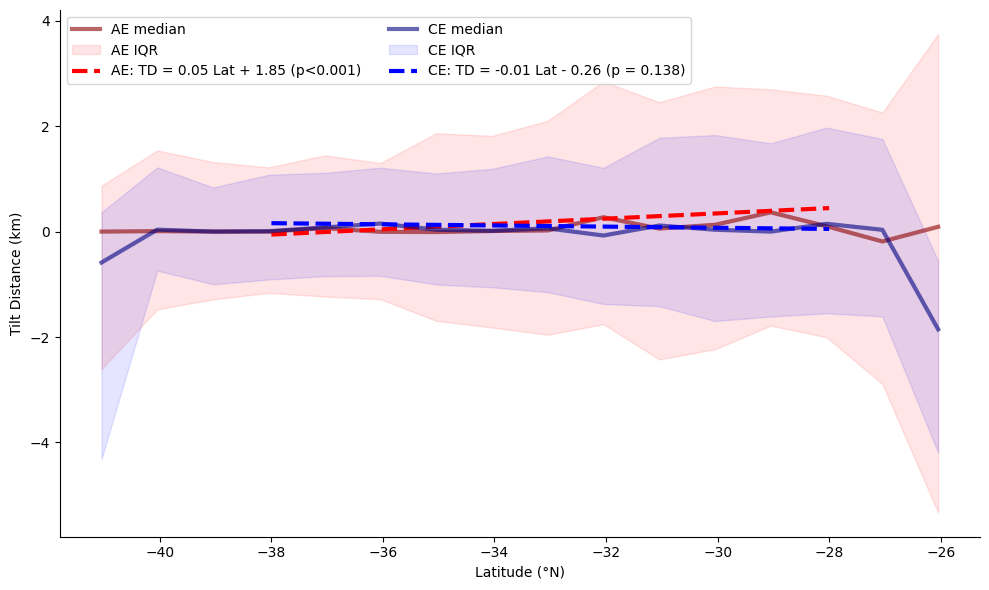

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
styles = {
    'AE': {'line': 'darkred', 'fill': 'red'},
    'CE': {'line': 'navy',    'fill': 'blue'}
}

bins = np.arange(lat_rho.min(), lat_rho.max(), 1)
bin_centers = .5 * (bins[:-1] + bins[1:])

for cyc in ['AE', 'CE']:
    df_masked = df_eddies[df_eddies.Cyc == cyc].copy()
    df_masked = df_masked.dropna(subset=['Lat', 'diff_TDis'])

    tilt = df_masked['diff_TDis']
    lat  = df_masked['Lat']
    
    digitized = np.digitize(lat, bins)
    median = [tilt[digitized == i].median()        for i in range(1, len(bins))]
    q25    = [tilt[digitized == i].quantile(0.25)  for i in range(1, len(bins))]
    q75    = [tilt[digitized == i].quantile(0.75)  for i in range(1, len(bins))]

    # median + IQR (all data)
    ax.plot(bin_centers, median, color=styles[cyc]['line'], lw=3, label=f'{cyc} median', alpha=.6)
    ax.fill_between(
        bin_centers,
        q25, q75,
        color=styles[cyc]['fill'],
        alpha=0.1,
        label=f'{cyc} IQR'
    )

    # ---- regression ----
    reg_mask = (lat <= -28) & (lat >= -38)
    lat_reg  = lat[reg_mask]
    tilt_reg = tilt[reg_mask]

    if len(lat_reg) > 1:
        slope, intercept, r_value, p_value, std_err = linregress(lat_reg.values, tilt_reg.values)

        lat_line  = np.linspace(lat_reg.min(), lat_reg.max(), 100)
        tilt_line = slope * lat_line + intercept

        m, c = slope, intercept
        if c >= 0:
            eq_str = f'TD = {m:.2f} Lat + {c:.2f}'
        else:
            eq_str = f'TD = {m:.2f} Lat - {abs(c):.2f}'

        p_str = 'p<0.001' if p_value < 0.001 else f'p = {p_value:.3f}'

        ax.plot(
            lat_line,
            tilt_line,
            lw=3,
            color=styles[cyc]['fill'],
            linestyle='--',
            label=f'{cyc}: {eq_str} ({p_str})'
        )

# ax.set_ylim(0, None)
ax.set_xlabel(r'Latitude (°N)')
ax.set_ylabel('Tilt Distance (km)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left', ncol=2)
# ax.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df_eddies.diff_TDis.min()


np.float64(-93.36414958650072)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


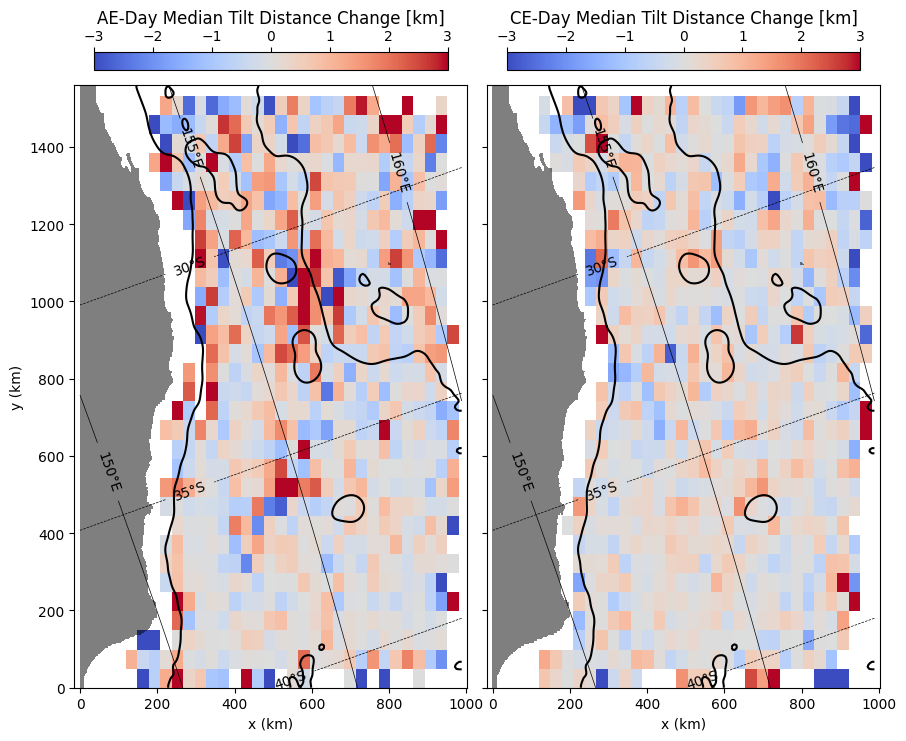

In [9]:
def _nice_step(h, base):
    s = h / base
    for k in [1, 2, 2.5, 5, 10]:
        if s <= k: 
            return k * base
    return np.ceil(s) * base

def _grid_step(G):
    gx = np.diff(np.sort(np.unique(G.ravel())))
    return np.nanmedian(gx[gx > 0])

def _bin_edges_fd(x, grid, scale=1.0, rule='fd'):
    x = np.asarray(x)
    x = x[np.isfinite(x)]
    n = len(x)
    if n < 2:
        lo, hi = np.nanmin(x), np.nanmax(x)
        return np.array([lo, hi])

    iqr = np.subtract(*np.percentile(x, [75, 25]))
    std = np.std(x, ddof=1)

    if rule.lower() == 'fd':
        bw = 2 * (iqr if iqr > 0 else 1.349 * std) / (n ** (1/3))
    else:
        bw = 3.5 * std / (n ** (1/3))

    if not np.isfinite(bw) or bw <= 0:
        rng = np.ptp(x)
        bw = rng / max(10, np.sqrt(n))

    base = _grid_step(grid)
    bw = _nice_step(scale * bw, base)

    lo = np.floor(np.nanmin(x) / bw) * bw
    hi = np.ceil(np.nanmax(x) / bw) * bw
    return np.arange(lo, hi + bw, bw)

xbins = _bin_edges_fd(df_eddies.xc.values, X_grid, scale=1.0, rule='fd')
ybins = _bin_edges_fd(df_eddies.yc.values, Y_grid, scale=1.0, rule='fd')

vmin, vmax = -3, 3
levels_lat = [-40, -35, -30, -25]
levels_lon = [150, 155, 160]

from matplotlib.colors import Normalize
norm = Normalize(vmin=vmin, vmax=vmax)
cmaps = {"AE-Day": "coolwarm", "CE-Day": "coolwarm"}

def binned_median(x, y, v, xbins, ybins):
    ix = np.digitize(x, xbins) - 1
    iy = np.digitize(y, ybins) - 1
    nx, ny = len(xbins) - 1, len(ybins) - 1
    ok = (ix >= 0) & (ix < nx) & (iy >= 0) & (iy < ny) & np.isfinite(v)

    ix, iy, v = ix[ok], iy[ok], v[ok]
    flat = iy * nx + ix

    hmed = np.full(nx * ny, np.nan)
    for k in np.unique(flat):
        hmed[k] = np.nanmedian(v[flat == k])

    return hmed.reshape(ny, nx)

fig, axs = plt.subplots(1, 2, figsize=(9, 8), sharey=True)

for ax, cyc in zip(axs, ['AE-Day', 'CE-Day']):
    df = df_eddies[df_eddies.Cyc == cyc[:2]].copy()
    df = df.sort_values('diff_TDis', kind='mergesort', ignore_index=True)

    ax.contour(X_grid, Y_grid, h, levels=[4000], colors='k')

    H = binned_median(df.xc.values, df.yc.values, df.diff_TDis.values, xbins, ybins)
    m = ax.pcolormesh(xbins, ybins, H, cmap=cmaps[cyc], norm=norm,
                      shading='auto', rasterized=True)
    cb = fig.colorbar(m, ax=ax, location='top', shrink=0.9, pad=0.02)
    cb.set_label(f'{cyc} Median Tilt Distance Change [km]', fontsize=12)
    cb.set_ticks(np.linspace(vmin, vmax, 7))

    ax.contourf(X_grid, Y_grid, np.where(mask_rho == 0, 1, np.nan),
                levels=[0.5, 1.5], colors=['k'], alpha=.5)

    c1 = ax.contour(X_grid, Y_grid, lat_rho, levels=levels_lat,
                    colors='k', linewidths=.5)
    ax.clabel(c1, fmt=lambda v: f"{-v:.0f}°S", inline=True, colors='k')
    c2 = ax.contour(X_grid, Y_grid, lon_rho, levels=levels_lon,
                    colors='k', linewidths=.5)
    ax.clabel(c2, fmt=lambda v: f"{v:.0f}°E", inline=True, colors='k')

    ax.axis('equal')
    ax.set_xlim(X_grid.min(), X_grid.max())
    ax.set_ylim(Y_grid.min(), Y_grid.max())

for ax in axs:
    ax.set_xlabel('x (km)')
axs[0].set_ylabel('y (km)')

plt.tight_layout()
plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


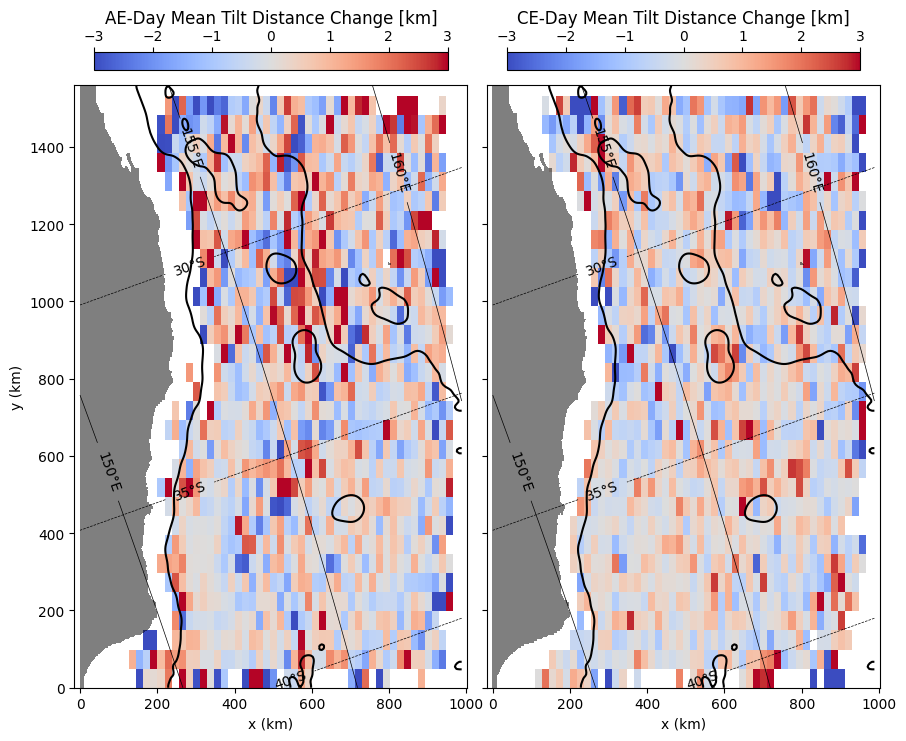

In [19]:
def _nice_step(h, base):
    s = h / base
    for k in [1, 2, 2.5, 5, 10]:
        if s <= k: 
            return k * base
    return np.ceil(s) * base

def _grid_step(G):
    gx = np.diff(np.sort(np.unique(G.ravel())))
    return np.nanmean(gx[gx > 0])

def _bin_edges_fd(x, grid, scale=1.0, rule='fd'):
    x = np.asarray(x)
    x = x[np.isfinite(x)]
    n = len(x)
    if n < 2:
        lo, hi = np.nanmin(x), np.nanmax(x)
        return np.array([lo, hi])

    iqr = np.subtract(*np.percentile(x, [75, 25]))
    std = np.std(x, ddof=1)

    if rule.lower() == 'fd':
        bw = 2 * (iqr if iqr > 0 else 1.349 * std) / (n ** (1/3))
    else:
        bw = 3.5 * std / (n ** (1/3))

    if not np.isfinite(bw) or bw <= 0:
        rng = np.ptp(x)
        bw = rng / max(10, np.sqrt(n))

    base = _grid_step(grid)
    bw = _nice_step(scale * bw, base)

    lo = np.floor(np.nanmin(x) / bw) * bw
    hi = np.ceil(np.nanmax(x) / bw) * bw
    return np.arange(lo, hi + bw, bw)

xbins = _bin_edges_fd(df_eddies.xc.values, X_grid, scale=1.0, rule='fd')
ybins = _bin_edges_fd(df_eddies.yc.values, Y_grid, scale=1.0, rule='fd')

vmin, vmax = -3, 3
levels_lat = [-40, -35, -30, -25]
levels_lon = [150, 155, 160]

from matplotlib.colors import Normalize
norm = Normalize(vmin=vmin, vmax=vmax)
cmaps = {"AE-Day": "coolwarm", "CE-Day": "coolwarm"}

def binned_mean(x, y, v, xbins, ybins):
    ix = np.digitize(x, xbins) - 1
    iy = np.digitize(y, ybins) - 1
    nx, ny = len(xbins) - 1, len(ybins) - 1
    ok = (ix >= 0) & (ix < nx) & (iy >= 0) & (iy < ny) & np.isfinite(v)

    ix, iy, v = ix[ok], iy[ok], v[ok]
    flat = iy * nx + ix

    hmed = np.full(nx * ny, np.nan)
    for k in np.unique(flat):
        hmed[k] = np.nanmean(v[flat == k])

    return hmed.reshape(ny, nx)

fig, axs = plt.subplots(1, 2, figsize=(9, 8), sharey=True)

for ax, cyc in zip(axs, ['AE-Day', 'CE-Day']):
    df = df_eddies[df_eddies.Cyc == cyc[:2]].copy()
    df = df.sort_values('diff_TDis', kind='mergesort', ignore_index=True)

    ax.contour(X_grid, Y_grid, h, levels=[4000], colors='k')

    H = binned_mean(df.xc.values, df.yc.values, df.diff_TDis.values, xbins, ybins)
    m = ax.pcolormesh(xbins, ybins, H, cmap=cmaps[cyc], norm=norm,
                      shading='auto', rasterized=True)
    cb = fig.colorbar(m, ax=ax, location='top', shrink=0.9, pad=0.02)
    cb.set_label(f'{cyc} Mean Tilt Distance Change [km]', fontsize=12)
    cb.set_ticks(np.linspace(vmin, vmax, 7))

    ax.contourf(X_grid, Y_grid, np.where(mask_rho == 0, 1, np.nan),
                levels=[0.5, 1.5], colors=['k'], alpha=.5)

    c1 = ax.contour(X_grid, Y_grid, lat_rho, levels=levels_lat,
                    colors='k', linewidths=.5)
    ax.clabel(c1, fmt=lambda v: f"{-v:.0f}°S", inline=True, colors='k')
    c2 = ax.contour(X_grid, Y_grid, lon_rho, levels=levels_lon,
                    colors='k', linewidths=.5)
    ax.clabel(c2, fmt=lambda v: f"{v:.0f}°E", inline=True, colors='k')

    ax.axis('equal')
    ax.set_xlim(X_grid.min(), X_grid.max())
    ax.set_ylim(Y_grid.min(), Y_grid.max())

for ax in axs:
    ax.set_xlabel('x (km)')
axs[0].set_ylabel('y (km)')

plt.tight_layout()
plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


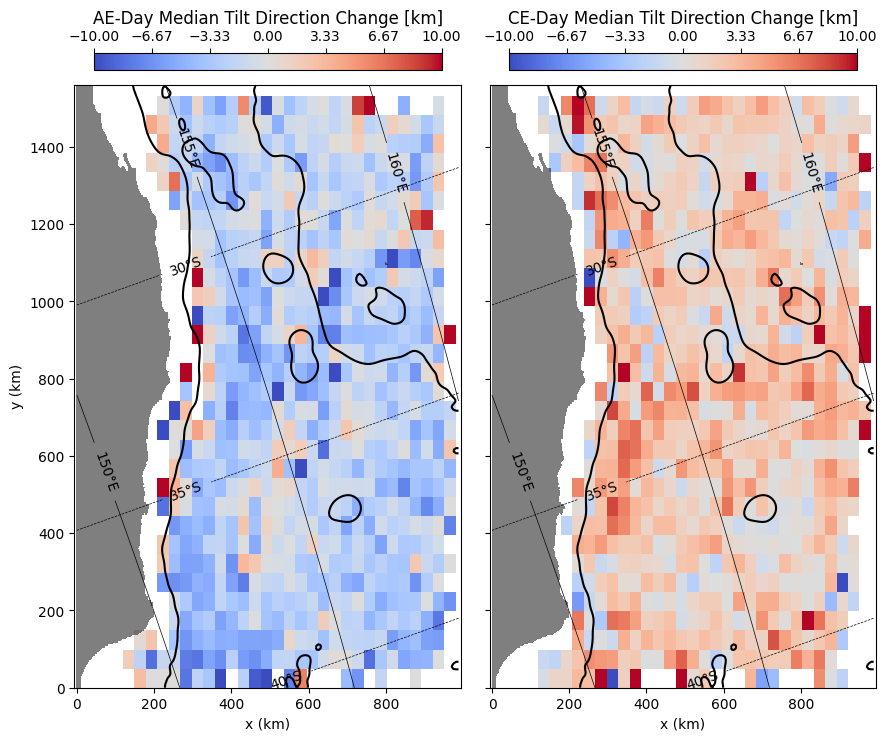

In [10]:
def _nice_step(h, base):
    s = h / base
    for k in [1, 2, 2.5, 5, 10]:
        if s <= k: 
            return k * base
    return np.ceil(s) * base

def _grid_step(G):
    gx = np.diff(np.sort(np.unique(G.ravel())))
    return np.nanmedian(gx[gx > 0])

def _bin_edges_fd(x, grid, scale=1.0, rule='fd'):
    x = np.asarray(x)
    x = x[np.isfinite(x)]
    n = len(x)
    if n < 2:
        lo, hi = np.nanmin(x), np.nanmax(x)
        return np.array([lo, hi])

    iqr = np.subtract(*np.percentile(x, [75, 25]))
    std = np.std(x, ddof=1)

    if rule.lower() == 'fd':
        bw = 2 * (iqr if iqr > 0 else 1.349 * std) / (n ** (1/3))
    else:
        bw = 3.5 * std / (n ** (1/3))

    if not np.isfinite(bw) or bw <= 0:
        rng = np.ptp(x)
        bw = rng / max(10, np.sqrt(n))

    base = _grid_step(grid)
    bw = _nice_step(scale * bw, base)

    lo = np.floor(np.nanmin(x) / bw) * bw
    hi = np.ceil(np.nanmax(x) / bw) * bw
    return np.arange(lo, hi + bw, bw)

xbins = _bin_edges_fd(df_eddies.xc.values, X_grid, scale=1.0, rule='fd')
ybins = _bin_edges_fd(df_eddies.yc.values, Y_grid, scale=1.0, rule='fd')

vmin, vmax = -10, 10
levels_lat = [-40, -35, -30, -25]
levels_lon = [150, 155, 160]

from matplotlib.colors import Normalize
norm = Normalize(vmin=vmin, vmax=vmax)
cmaps = {"AE-Day": "coolwarm", "CE-Day": "coolwarm"}

def binned_median(x, y, v, xbins, ybins):
    ix = np.digitize(x, xbins) - 1
    iy = np.digitize(y, ybins) - 1
    nx, ny = len(xbins) - 1, len(ybins) - 1
    ok = (ix >= 0) & (ix < nx) & (iy >= 0) & (iy < ny) & np.isfinite(v)

    ix, iy, v = ix[ok], iy[ok], v[ok]
    flat = iy * nx + ix

    hmed = np.full(nx * ny, np.nan)
    for k in np.unique(flat):
        hmed[k] = np.nanmedian(v[flat == k])

    return hmed.reshape(ny, nx)

fig, axs = plt.subplots(1, 2, figsize=(9, 8), sharey=True)

for ax, cyc in zip(axs, ['AE-Day', 'CE-Day']):
    df = df_eddies[df_eddies.Cyc == cyc[:2]].copy()
    df = df.sort_values('diff_TDir', kind='mergesort', ignore_index=True)

    ax.contour(X_grid, Y_grid, h, levels=[4000], colors='k')

    H = binned_median(df.xc.values, df.yc.values, df.diff_TDir.values, xbins, ybins)
    m = ax.pcolormesh(xbins, ybins, H, cmap=cmaps[cyc], norm=norm,
                      shading='auto', rasterized=True)
    cb = fig.colorbar(m, ax=ax, location='top', shrink=0.9, pad=0.02)
    cb.set_label(f'{cyc} Median Tilt Direction Change [km]', fontsize=12)
    cb.set_ticks(np.linspace(vmin, vmax, 7))

    ax.contourf(X_grid, Y_grid, np.where(mask_rho == 0, 1, np.nan),
                levels=[0.5, 1.5], colors=['k'], alpha=.5)

    c1 = ax.contour(X_grid, Y_grid, lat_rho, levels=levels_lat,
                    colors='k', linewidths=.5)
    ax.clabel(c1, fmt=lambda v: f"{-v:.0f}°S", inline=True, colors='k')
    c2 = ax.contour(X_grid, Y_grid, lon_rho, levels=levels_lon,
                    colors='k', linewidths=.5)
    ax.clabel(c2, fmt=lambda v: f"{v:.0f}°E", inline=True, colors='k')

    ax.axis('equal')
    ax.set_xlim(X_grid.min(), X_grid.max())
    ax.set_ylim(Y_grid.min(), Y_grid.max())

for ax in axs:
    ax.set_xlabel('x (km)')
axs[0].set_ylabel('y (km)')

plt.tight_layout()
plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


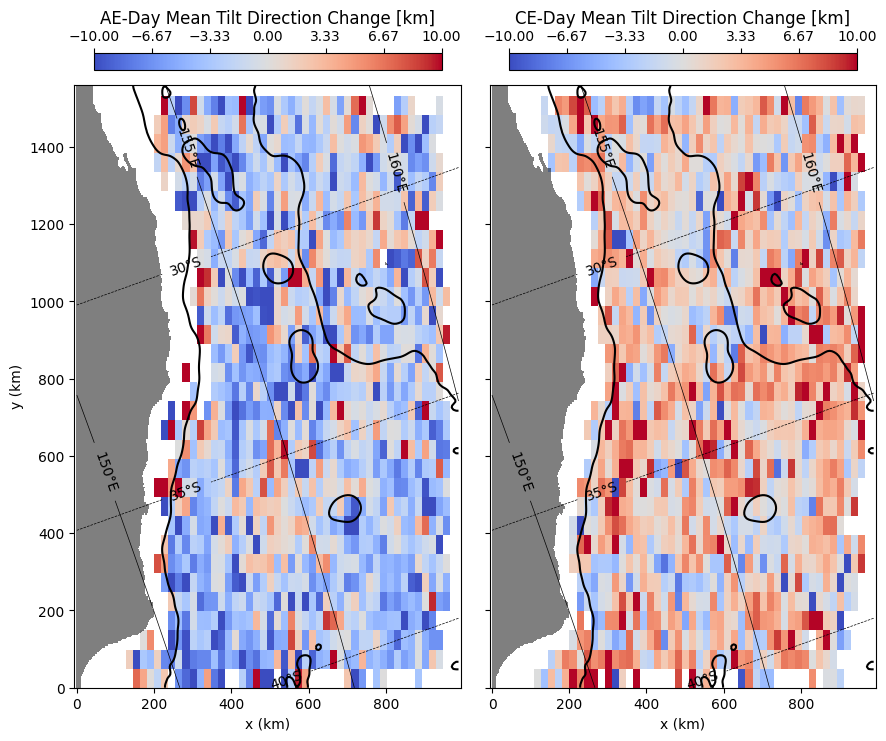

In [20]:
def _nice_step(h, base):
    s = h / base
    for k in [1, 2, 2.5, 5, 10]:
        if s <= k: 
            return k * base
    return np.ceil(s) * base

def _grid_step(G):
    gx = np.diff(np.sort(np.unique(G.ravel())))
    return np.nanmean(gx[gx > 0])

def _bin_edges_fd(x, grid, scale=1.0, rule='fd'):
    x = np.asarray(x)
    x = x[np.isfinite(x)]
    n = len(x)
    if n < 2:
        lo, hi = np.nanmin(x), np.nanmax(x)
        return np.array([lo, hi])

    iqr = np.subtract(*np.percentile(x, [75, 25]))
    std = np.std(x, ddof=1)

    if rule.lower() == 'fd':
        bw = 2 * (iqr if iqr > 0 else 1.349 * std) / (n ** (1/3))
    else:
        bw = 3.5 * std / (n ** (1/3))

    if not np.isfinite(bw) or bw <= 0:
        rng = np.ptp(x)
        bw = rng / max(10, np.sqrt(n))

    base = _grid_step(grid)
    bw = _nice_step(scale * bw, base)

    lo = np.floor(np.nanmin(x) / bw) * bw
    hi = np.ceil(np.nanmax(x) / bw) * bw
    return np.arange(lo, hi + bw, bw)

xbins = _bin_edges_fd(df_eddies.xc.values, X_grid, scale=1.0, rule='fd')
ybins = _bin_edges_fd(df_eddies.yc.values, Y_grid, scale=1.0, rule='fd')

vmin, vmax = -10, 10
levels_lat = [-40, -35, -30, -25]
levels_lon = [150, 155, 160]

from matplotlib.colors import Normalize
norm = Normalize(vmin=vmin, vmax=vmax)
cmaps = {"AE-Day": "coolwarm", "CE-Day": "coolwarm"}

def binned_mean(x, y, v, xbins, ybins):
    ix = np.digitize(x, xbins) - 1
    iy = np.digitize(y, ybins) - 1
    nx, ny = len(xbins) - 1, len(ybins) - 1
    ok = (ix >= 0) & (ix < nx) & (iy >= 0) & (iy < ny) & np.isfinite(v)

    ix, iy, v = ix[ok], iy[ok], v[ok]
    flat = iy * nx + ix

    hmed = np.full(nx * ny, np.nan)
    for k in np.unique(flat):
        hmed[k] = np.nanmean(v[flat == k])

    return hmed.reshape(ny, nx)

fig, axs = plt.subplots(1, 2, figsize=(9, 8), sharey=True)

for ax, cyc in zip(axs, ['AE-Day', 'CE-Day']):
    df = df_eddies[df_eddies.Cyc == cyc[:2]].copy()
    df = df.sort_values('diff_TDir', kind='mergesort', ignore_index=True)

    ax.contour(X_grid, Y_grid, h, levels=[4000], colors='k')

    H = binned_mean(df.xc.values, df.yc.values, df.diff_TDir.values, xbins, ybins)
    m = ax.pcolormesh(xbins, ybins, H, cmap=cmaps[cyc], norm=norm,
                      shading='auto', rasterized=True)
    cb = fig.colorbar(m, ax=ax, location='top', shrink=0.9, pad=0.02)
    cb.set_label(f'{cyc} Mean Tilt Direction Change [km]', fontsize=12)
    cb.set_ticks(np.linspace(vmin, vmax, 7))

    ax.contourf(X_grid, Y_grid, np.where(mask_rho == 0, 1, np.nan),
                levels=[0.5, 1.5], colors=['k'], alpha=.5)

    c1 = ax.contour(X_grid, Y_grid, lat_rho, levels=levels_lat,
                    colors='k', linewidths=.5)
    ax.clabel(c1, fmt=lambda v: f"{-v:.0f}°S", inline=True, colors='k')
    c2 = ax.contour(X_grid, Y_grid, lon_rho, levels=levels_lon,
                    colors='k', linewidths=.5)
    ax.clabel(c2, fmt=lambda v: f"{v:.0f}°E", inline=True, colors='k')

    ax.axis('equal')
    ax.set_xlim(X_grid.min(), X_grid.max())
    ax.set_ylim(Y_grid.min(), Y_grid.max())

for ax in axs:
    ax.set_xlabel('x (km)')
axs[0].set_ylabel('y (km)')

plt.tight_layout()
plt.show()


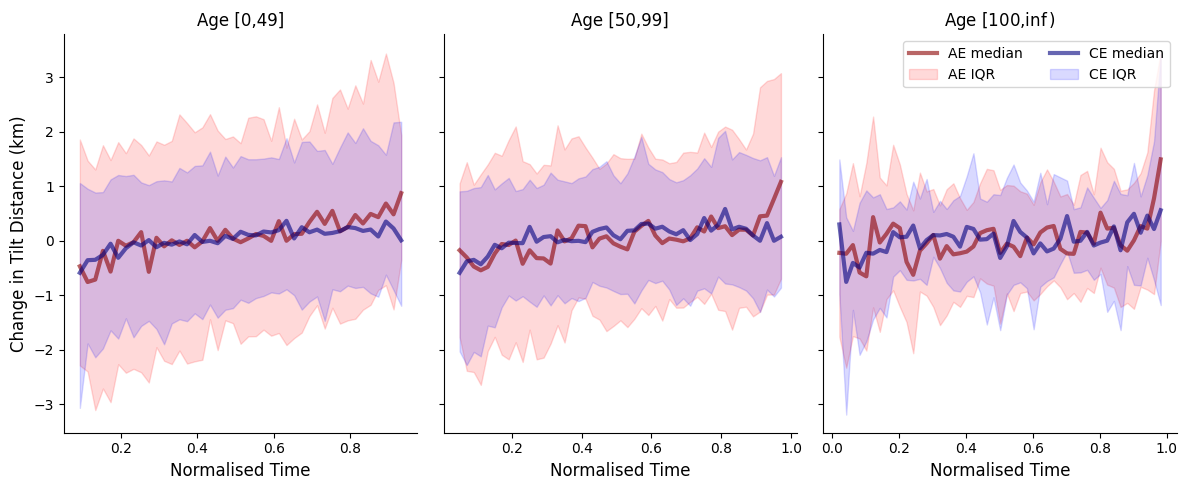

In [21]:
# Dimensionless Time
g = df_eddies.groupby('Eddy')
df_eddies['norm_time'] = g.cumcount() / (g['Eddy'].transform('size') - 1)

df_AE = df_eddies[df_eddies.Cyc=='AE'].copy()
df_CE = df_eddies[df_eddies.Cyc=='CE'].copy()

bin_width = 0.02

styles = {
    'AE': {'line': 'darkred', 'fill': 'red'},
    'CE': {'line': 'navy',    'fill': 'blue'}
}

age_bins = [(0, 49), (50, 99), (100, np.inf)]
labels = ['Age [0,49]', 'Age [50,99]', r'Age [100,$\inf$)']

fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

for ax, (age1, age2), title in zip(axes, age_bins, labels):

    df_sel = {}
    for cyc, df_data in zip(['AE', 'CE'], [df_AE, df_CE]):
        df_list = []
        for eddy in df_data.Eddy.unique():
            seg = df_data[df_data.Eddy == eddy]
            if (seg.Age.iloc[0] >= age1) & (seg.Age.iloc[0] <= age2):
                df_list.append(pd.DataFrame({'x': seg.norm_time, 'y': seg.diff_TDis}))
        df_sel[cyc] = pd.concat(df_list, ignore_index=True).dropna() if df_list else \
                      pd.DataFrame(columns=['x','y'])

    x_arrays = [df_sel['AE'].x.values, df_sel['CE'].x.values]
    x_all = np.concatenate([arr for arr in x_arrays if len(arr)>0])
    bins = np.arange(x_all.min(), x_all.max() + bin_width, bin_width)

    for cyc in ['AE','CE']:
        df = df_sel[cyc]
        if df.empty:
            continue

        x = df.x.values
        y = df.y.values

        df['bin'] = pd.cut(df.x, bins=bins, include_lowest=True)
        grp = df.groupby('bin', observed=False)['y']
        med = grp.median()
        q25 = grp.quantile(0.25)
        q75 = grp.quantile(0.75)

        bin_centers = np.array([b.mid for b in med.index])
        m = med.notna()

        ax.plot(bin_centers[m], med[m], lw=3, color=styles[cyc]['line'], alpha=0.6, label=f'{cyc} median')
        ax.fill_between(bin_centers[m], q25[m], q75[m], color=styles[cyc]['fill'], alpha=0.15, label=f'{cyc} IQR')

        slope, intercept, r, p, err = linregress(x, y)
        xl = np.linspace(x.min(), x.max(), 200)
        yl = slope * xl + intercept
        # Uncomment if you'd like regression lines
        # ax.plot(xl, yl, '--', lw=3, color=styles[cyc]['fill'], alpha=0.6)

    ax.set_title(title)
    # ax.set_ylim(0, 45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Normalised Time', fontsize=12)

axes[2].legend(loc='upper right', ncol=2)
axes[0].set_ylabel('Change in Tilt Distance (km)', fontsize=12)
plt.tight_layout()
plt.show()


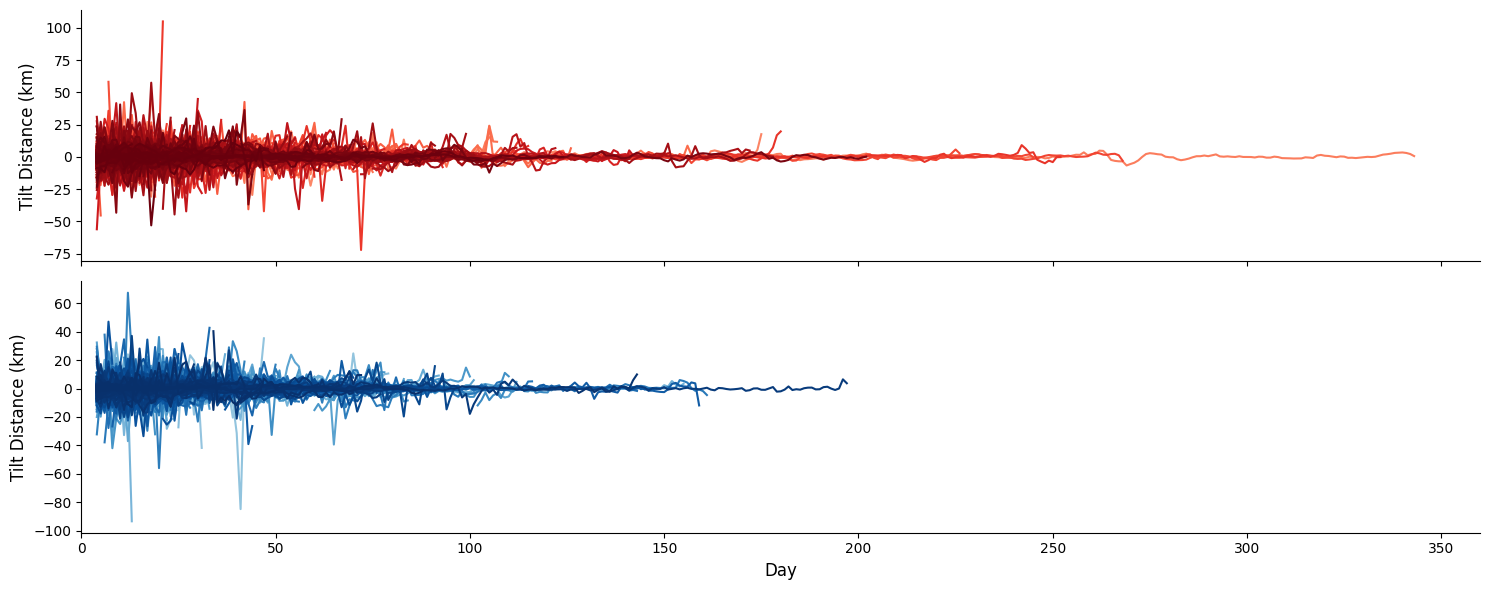

In [12]:
import matplotlib.cm as cm

ae = df_eddies[df_eddies.Cyc == 'AE'].Eddy.unique()
ce = df_eddies[df_eddies.Cyc == 'CE'].Eddy.unique()
# colour ranges
colors_ae = cm.Reds(np.linspace(0.4, 1, len(ae)))
colors_ce = cm.Blues(np.linspace(0.4, 1, len(ce)))

fig, axs = plt.subplots(2, 1, figsize=(15,6), sharex=True)
ae_idx, ce_idx = 0, 0
for eddy in df_eddies.Eddy.unique():
    df = df_eddies[df_eddies.Eddy==eddy]
    if df.Cyc.iloc[0] == 'AE':
        axs[0].plot(np.arange(len(df)), df.diff_TDis, color=colors_ae[ae_idx])
        # axs[0].set_xlabel('Day', fontsize=12)
        axs[0].set_ylabel('Tilt Distance (km)', fontsize=12)
        axs[0].spines['top'].set_visible(False)
        axs[0].spines['right'].set_visible(False)
        ae_idx += 1
    else:
        axs[1].plot(np.arange(len(df)), df.diff_TDis, color=colors_ce[ce_idx])
        axs[1].set_xlabel('Day', fontsize=12)
        axs[1].set_ylabel('Tilt Distance (km)', fontsize=12)
        axs[1].spines['top'].set_visible(False)
        axs[1].spines['right'].set_visible(False)
        ce_idx += 1
axs[0].set_xlim(0, None); axs[1].set_xlim(0, None)
plt.tight_layout()


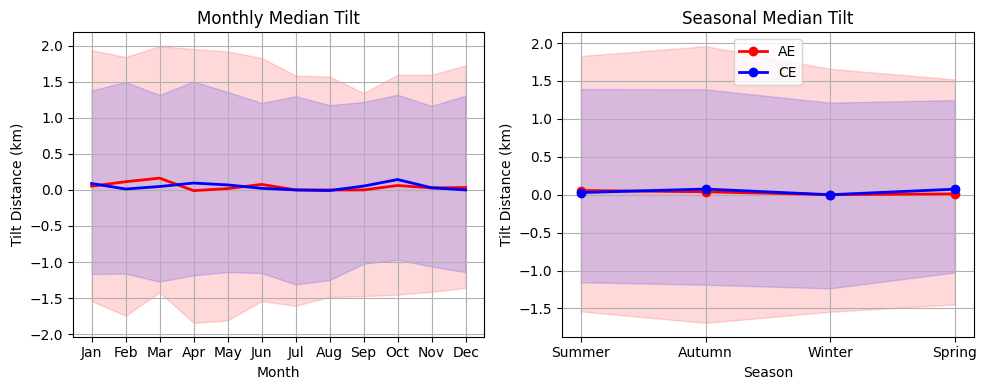

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

# -------------------
# 1) MONTHLY PANEL
# -------------------
ax = axs[0]

for label, df, c in [('AE', df_AE, 'r'), ('CE', df_CE, 'b')]:
    df_ = df.copy()
    df_['Month'] = df_.Date.dt.month

    g = df_.groupby('Month').diff_TDis
    med = g.median()
    q25 = g.quantile(0.25)
    q75 = g.quantile(0.75)

    ax.plot(med.index, med.values, lw=2, color=c, label=label)
    ax.fill_between(med.index, q25, q75, color=c, alpha=0.15)

ax.set_xticks(range(1,13))
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                    'Jul','Aug','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Tilt Distance (km)')
# ax.set_ylim(0, 40)
ax.set_title('Monthly Median Tilt')
ax.grid(True)

# -------------------
# 2) SEASONAL PANEL
# -------------------
ax = axs[1]

season_map = {
    12:'Summer',1:'Summer',2:'Summer',
    3:'Autumn',4:'Autumn',5:'Autumn',
    6:'Winter',7:'Winter',8:'Winter',
    9:'Spring',10:'Spring',11:'Spring'
}
season_order = ['Summer','Autumn','Winter','Spring']

for label, df, c in [('AE', df_AE, 'r'), ('CE', df_CE, 'b')]:
    df_ = df.copy()
    df_['Season'] = df_['Date'].dt.month.map(season_map)
    df_['Season'] = pd.Categorical(df_['Season'], categories=season_order, ordered=True)

    g = df_.groupby('Season', observed=True).diff_TDis
    med = g.median().reindex(season_order)
    q25 = g.quantile(0.25).reindex(season_order)
    q75 = g.quantile(0.75).reindex(season_order)

    x = np.arange(len(season_order))
    ax.plot(x, med.values, lw=2, marker='o', color=c, label=label)
    ax.fill_between(x, q25, q75, color=c, alpha=0.15)

ax.set_xticks(x)
ax.set_xticklabels(season_order)
ax.set_xlabel('Season')
ax.set_ylabel('Tilt Distance (km)')
# ax.set_ylim(0, 40)
ax.set_title('Seasonal Median Tilt')
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# with open('/srv/scratch/z5297792/Chapter2/SEACOFS_26yr_Eddy_Dataset/Eddy_Data/Vertical_Eddy_Dataset/dic_vert_eddies.pkl', 'rb') as f:
#     dic_eddies_vert = pickle.load(f)

# # Eddy Propogation Speed
# eddy_props = []
# for eddy in df_eddies.Eddy.unique():
#     df = df_eddies[df_eddies.Eddy==eddy].copy()
#     eddy_props.extend(np.array(np.hypot(df.xc.diff(), df.yc.diff()) * 0.011574))
# df_eddies['EddyProp'] = eddy_props

# # displacement of top center
# dxs, dys = [], []
# for eddy in df_eddies.Eddy.unique():
#     df = df_eddies[df_eddies.Eddy==eddy].copy()
#     dxs.extend(df.xc.diff())
#     dys.extend(df.yc.diff())
# df_eddies['dx_top'] = dxs
# df_eddies['dy_top'] = dys

# # bottom of eddy propogation
# df_idx = df_eddies.set_index(['Eddy', 'Day'])
# eddy_btm_prop = []
# for eddy, dic in dic_eddies_vert.items():
#     x_btms, y_btms = [], []
#     eddy_id = int(eddy[4:])
#     for day, df in dic.items():
#         if len(df):
#             df = df.copy()
#             df = df[df.Depth.abs() < 1000]
#             data = df.iloc[-1]
#             xc, yc = data.x, data.y
#         else:
#             day_id = int(day[3:])
#             data = df_idx.loc[(eddy_id, day_id)]
#             xc, yc = data.xc, data.yc
#         x_btms.append(xc)
#         y_btms.append(yc)
#     disp = np.hypot(np.diff(x_btms), np.diff(y_btms)) * 0.011574
#     disp = np.insert(disp, 0, np.nan)   # add NaN at the start
#     eddy_btm_prop.extend(disp)
# df_eddies['btm_prop'] = eddy_btm_prop

# # displacement of bottom center
# df_idx = df_eddies.set_index(['Eddy', 'Day'])
# dxs, dys = [], []
# for eddy, dic in dic_eddies_vert.items():
#     x_btms, y_btms = [], []
#     eddy_id = int(eddy[4:])
#     for day, df in dic.items():
#         if len(df):
#             df = df.copy()
#             df = df[df.Depth.abs() < 1000]
#             data = df.iloc[-1]
#             xc, yc = data.x, data.y
#         else:
#             day_id = int(day[3:])
#             data = df_idx.loc[(eddy_id, day_id)]
#             xc, yc = data.xc, data.yc
#         x_btms.append(xc)
#         y_btms.append(yc)
#     dx = np.diff(x_btms)
#     dy = np.diff(y_btms)
#     dx = np.insert(dx, 0, np.nan)  
#     dy = np.insert(dy, 0, np.nan) 
#     dxs.extend(dx)
#     dys.extend(dy)
# df_eddies['dx_btm'] = dxs
# df_eddies['dy_btm'] = dys

# # vector difference between top and bottom m/s
# df_eddies['top_btm_diff'] = np.hypot(df_eddies.dx_btm - df_eddies.dx_top,
#                                      df_eddies.dy_btm - df_eddies.dy_top)  * 0.011574

# df_AE = df_eddies[df_eddies.Cyc=='AE'].copy()
# df_CE = df_eddies[df_eddies.Cyc=='CE'].copy()


In [15]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)

# styles = {
#     'AE': {'line': 'darkred',  'fill': 'red'},
#     'CE': {'line': 'navy',     'fill': 'blue'}
# }

# # ======================================================================
# # PANEL 1: Tilt vs EddyProp
# # ======================================================================

# split1 = 0.15
# int1, int2 = 0.01, 0.05
# bins1 = np.concatenate([
#     np.arange(0, split1, int1),
#     np.arange(split1, 0.4 + int2, int2)
# ])
# bin_centers1 = 0.5 * (bins1[:-1] + bins1[1:])

# for cyc, df_cyc in [('AE', df_AE), ('CE', df_CE)]:
#     df = df_cyc[['EddyProp', 'diff_TDis']].dropna().copy()
#     xval = df['EddyProp'].values
#     tilt = df['diff_TDis'].values

#     digitized = np.digitize(xval, bins1)
#     median = [np.nanmedian(tilt[digitized == i])        for i in range(1, len(bins1))]
#     q25    = [np.nanquantile(tilt[digitized == i], .25) for i in range(1, len(bins1))]
#     q75    = [np.nanquantile(tilt[digitized == i], .75) for i in range(1, len(bins1))]

#     median = np.array(median)
#     q25    = np.array(q25)
#     q75    = np.array(q75)
#     mask   = np.isfinite(median)

#     # ax1.scatter(xval, tilt, s=1, alpha=0.08, marker='.',
#     #        color=styles[cyc]['fill'])

#     ax1.plot(bin_centers1[mask], median[mask],
#              lw=3, alpha=.6, color=styles[cyc]['line'],
#              label=f'{cyc} median')

#     ax1.fill_between(bin_centers1[mask], q25[mask], q75[mask],
#                      alpha=0.10, color=styles[cyc]['fill'],
#                      label=f'{cyc} IQR')

#     if len(xval) > 2:
#         m, c, r, p, se = linregress(xval, tilt)
#         xx = np.linspace(xval.min(), xval.max(), 100)
#         yy = m * xx + c
#         eq_str = f'TD = {m:.2f} U + {c:.2f}' if c >= 0 else f'TD = {m:.2f} U - {abs(c):.2f}'
#         p_str  = 'p<0.001' if p < 0.001 else f'p = {p:.3f}'
#         ax1.plot(xx, yy, '--', lw=2, color=styles[cyc]['fill'],
#                  label=f'{cyc}: {eq_str} ({p_str})')

# ax1.set_xlim(0, 0.4)
# # ax1.set_ylim(0, 60)
# ax1.set_xlabel(r'Surface Propagation Speed (ms$^{-1}$)')
# ax1.set_ylabel('Tilt Distance (km)')
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.legend(loc='upper left', ncol=1)

# # ======================================================================
# # PANEL 2: Tilt vs btm_prop (same as EddyProp)
# # ======================================================================

# for cyc, df_cyc in [('AE', df_AE), ('CE', df_CE)]:
#     df = df_cyc[['btm_prop', 'diff_TDis']].dropna().copy()
#     xval = df['btm_prop'].values
#     tilt = df['diff_TDis'].values

#     digitized = np.digitize(xval, bins1)
#     median = [np.nanmedian(tilt[digitized == i])        for i in range(1, len(bins1))]
#     q25    = [np.nanquantile(tilt[digitized == i], .25) for i in range(1, len(bins1))]
#     q75    = [np.nanquantile(tilt[digitized == i], .75) for i in range(1, len(bins1))]

#     median = np.array(median)
#     q25    = np.array(q25)
#     q75    = np.array(q75)
#     mask   = np.isfinite(median)

#     # ax2.scatter(xval, tilt, s=1, alpha=0.08, marker='.',
#     #        color=styles[cyc]['fill'])

#     ax2.plot(bin_centers1[mask], median[mask],
#              lw=3, alpha=.6, color=styles[cyc]['line'],
#              label='')

#     ax2.fill_between(bin_centers1[mask], q25[mask], q75[mask],
#                      alpha=0.10, color=styles[cyc]['fill'],
#                      label='')

#     if len(xval) > 2:
#         m, c, r, p, se = linregress(xval, tilt)
#         xx = np.linspace(xval.min(), xval.max(), 100)
#         yy = m * xx + c
#         eq_str = f'TD = {m:.2f} U + {c:.2f}' if c >= 0 else f'TD = {m:.2f} U - {abs(c):.2f}'
#         p_str  = 'p<0.001' if p < 0.001 else f'p = {p:.3f}'
#         ax2.plot(xx, yy, '--', lw=2, color=styles[cyc]['fill'],
#                  label=f'{cyc}: {eq_str} ({p_str})')

# ax2.set_xlim(0, 0.4)
# # ax2.set_ylim(0, 60)
# ax2.set_xlabel(r'Bottom Propagation Speed (ms$^{-1}$)')
# ax2.set_ylabel('Tilt Distance (km)')
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
# ax2.legend(loc='upper left', ncol=1)

# # ======================================================================
# # PANEL 3: Tilt vs top_btm_diff
# # ======================================================================

# split2 = 0.2
# int1, int2 = 0.02, 0.4
# bins2 = np.concatenate([
#     np.arange(0, split2, int1),
#     np.arange(split2, 1.8 + int2, int2)
# ])
# bin_centers2 = 0.5 * (bins2[:-1] + bins2[1:])

# for cyc, df_cyc in [('AE', df_AE), ('CE', df_CE)]:
#     df = df_cyc[['top_btm_diff', 'diff_TDis']].dropna().copy()
#     xval = df['top_btm_diff'].values
#     tilt = df['diff_TDis'].values

#     digitized = np.digitize(xval, bins2)
#     median = [np.nanmedian(tilt[digitized == i])        for i in range(1, len(bins2))]
#     q25    = [np.nanquantile(tilt[digitized == i], .25) for i in range(1, len(bins2))]
#     q75    = [np.nanquantile(tilt[digitized == i], .75) for i in range(1, len(bins2))]

#     median = np.array(median)
#     q25    = np.array(q25)
#     q75    = np.array(q75)
#     mask   = np.isfinite(median)

#     # ax3.scatter(xval, tilt, s=1, alpha=0.08, marker='.',
#     #        color=styles[cyc]['fill'])

#     ax3.plot(bin_centers2[mask], median[mask],
#              lw=3, alpha=.6, color=styles[cyc]['line'],
#              label='')

#     ax3.fill_between(bin_centers2[mask], q25[mask], q75[mask],
#                      alpha=0.10, color=styles[cyc]['fill'],
#                      label='')

#     if len(xval) > 2:
#         m, c, r, p, se = linregress(xval, tilt)
#         xx = np.linspace(xval.min(), xval.max(), 100)
#         yy = m * xx + c
#         eq_str = f'TD = {m:.2f} ΔU + {c:.2f}' if c >= 0 else f'TD = {m:.2f} ΔU - {abs(c):.2f}'
#         p_str  = 'p<0.001' if p < 0.001 else f'p = {p:.3f}'
#         ax3.plot(xx, yy, '--', lw=2, color=styles[cyc]['fill'],
#                  label=f'{cyc}: {eq_str} ({p_str})')

# ax3.set_xlim(0, 1.6)
# # ax3.set_ylim(0, 60)
# ax3.set_xlabel(r'Propagation ||Top - Bottom|| (ms$^{-1}$)')
# ax3.set_ylabel('Tilt Distance (km)')
# ax3.spines['top'].set_visible(False)
# ax3.spines['right'].set_visible(False)
# ax3.legend(loc='upper left', ncol=1)

# plt.show()


/home/z5297792/myenv310/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/z5297792/myenv310/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:1619: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


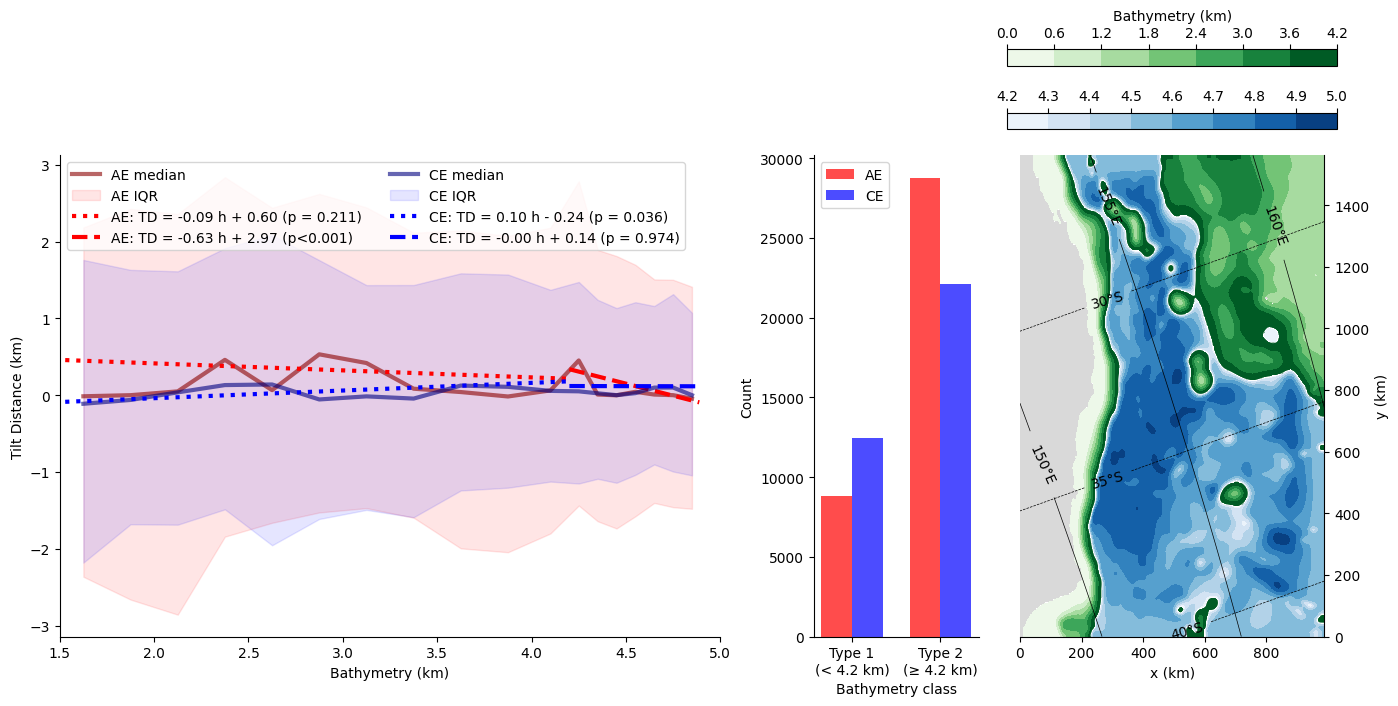

In [16]:
fig, (ax, ax_hist, ax2) = plt.subplots(
    1, 3, figsize=(14, 7),
    gridspec_kw={'width_ratios': [2, .5, 1]},
    constrained_layout=True
)

styles = {
    'AE': {'line': 'darkred',  'fill': 'red'},
    'CE': {'line': 'navy', 'fill': 'blue'}
}

split = 4.2
int1, int2 = 0.25, 0.1
bins = np.concatenate([
    np.arange(1.5, split, int1),
    np.arange(split, 5 + int2, int2)
])
bin_centers = 0.5 * (bins[:-1] + bins[1:])

bathy_AE = []
bathy_CE = []

for cyc in ['AE', 'CE']:
    df_masked = df_eddies[df_eddies.Cyc == cyc].dropna(subset=['h', 'diff_TDis']).copy()

    bathy = df_masked['h'].values / 1e3
    tilt  = df_masked['diff_TDis'].values

    if cyc == 'AE':
        bathy_AE.append(bathy)
    else:
        bathy_CE.append(bathy)

    digitized = np.digitize(bathy, bins)

    median = [np.nanmedian(tilt[digitized == i])        for i in range(1, len(bins))]
    q25    = [np.nanquantile(tilt[digitized == i], .25) for i in range(1, len(bins))]
    q75    = [np.nanquantile(tilt[digitized == i], .75) for i in range(1, len(bins))]

    # ax.scatter(bathy, tilt,
    #            s=1, alpha=0.1, marker='.', color=styles[cyc]['fill'])

    ax.plot(bin_centers, median, color=styles[cyc]['line'], lw=3, alpha=.6, label=f'{cyc} median')
    ax.fill_between(bin_centers, q25, q75, color=styles[cyc]['fill'], alpha=0.1, label=f'{cyc} IQR')

    mask_left = bathy < split
    if mask_left.sum() > 2:
        m1, c1, r1, p1, se1 = linregress(bathy[mask_left], tilt[mask_left])
        x1 = np.linspace(bathy[mask_left].min(), bathy[mask_left].max(), 100)
        y1 = m1 * x1 + c1
        eq_str = f'TD = {m1:.2f} h + {c1:.2f}' if c1 >= 0 else f'TD = {m1:.2f} h - {abs(c1):.2f}'
        p_str  = 'p<0.001' if p1 < 0.001 else f'p = {p1:.3f}'
        ax.plot(x1, y1, ':', lw=3, color=styles[cyc]['fill'], label=f'{cyc}: {eq_str} ({p_str})')

    mask_right = bathy >= split
    if mask_right.sum() > 2:
        m2, c2, r2, p2, se2 = linregress(bathy[mask_right], tilt[mask_right])
        x2 = np.linspace(bathy[mask_right].min(), bathy[mask_right].max(), 100)
        y2 = m2 * x2 + c2
        eq_str = f'TD = {m2:.2f} h + {c2:.2f}' if c2 >= 0 else f'TD = {m2:.2f} h - {abs(c2):.2f}'
        p_str  = 'p<0.001' if p2 < 0.001 else f'p = {p2:.3f}'
        ax.plot(x2, y2, '--', lw=3, color=styles[cyc]['fill'], label=f'{cyc}: {eq_str} ({p_str})')

bathy_AE = np.concatenate(bathy_AE) if bathy_AE else np.array([])
bathy_CE = np.concatenate(bathy_CE) if bathy_CE else np.array([])

# ax.text(2.5, 40, f'Type 1\n(< {split} km)')
# ax.text(4.5, 30, f'Type 2\n(≥ {split} km)')

# ------------------------------------------------------------------
# MIDDLE PANEL: TYPE 1 / TYPE 2 COUNTS (AE vs CE)
# Type 1: bathy < split
# Type 2: bathy >= split
# ------------------------------------------------------------------
type1_AE = np.sum(bathy_AE < split)
type2_AE = np.sum(bathy_AE >= split)
type1_CE = np.sum(bathy_CE < split)
type2_CE = np.sum(bathy_CE >= split)

x = np.arange(2)
width = 0.35

ax_hist.bar(x - width/2, [type1_AE, type2_AE],
            width=width, label='AE',
            alpha=0.7, color=styles['AE']['fill'])
ax_hist.bar(x + width/2, [type1_CE, type2_CE],
            width=width, label='CE',
            alpha=0.7, color=styles['CE']['fill'])

ax_hist.set_xticks(x)
ax_hist.set_xticklabels([f'Type 1\n(< {split} km)', f'Type 2\n(≥ {split} km)'])
ax_hist.set_ylabel('Count')
ax_hist.set_xlabel('Bathymetry class')
ax_hist.spines['top'].set_visible(False)
ax_hist.spines['right'].set_visible(False)
ax_hist.legend(loc='upper left')

# ------------------------------------------------------------------
# RIGHT PANEL: MAP (unchanged)
# ------------------------------------------------------------------
h_mask = np.where(mask_rho, h, np.nan)
cf = ax2.contourf(X_grid, Y_grid, np.where(h_mask/1e3 > split, np.nan, h_mask/1e3), cmap='Greens')#, vmax=split)
cbar = fig.colorbar(cf, ax=ax2, location='top')
cbar.set_label('Bathymetry (km)')
cf = ax2.contourf(X_grid, Y_grid, np.where(h_mask/1e3 < split, np.nan, h_mask/1e3), cmap='Blues')#, vmin=split)
cbar = fig.colorbar(cf, ax=ax2, location='top')
# cbar.set_label('Bathymetry (km)')
ax2.contourf(X_grid, Y_grid, np.where(mask_rho, np.nan, 1), cmap='Greys')
ax2.contour(X_grid, Y_grid, h/1e3, levels=[split], colors=['w'], linewidths=.5)

c1 = ax2.contour(X_grid, Y_grid, lat_rho, levels=levels_lat,
                colors='k', linewidths=0.5)
ax.clabel(c1, fmt=lambda v: f"{-v:.0f}°S", inline=True, colors='k')
c2 = ax2.contour(X_grid, Y_grid, lon_rho, levels=levels_lon,
                colors='k', linewidths=0.5)
ax.clabel(c2, fmt=lambda v: f"{v:.0f}°E", inline=True, colors='k')

# ax2.text(550, 1400, f'Type 1\n(< {split} km)')
# ax2.text(300, 300, f'Type 2\n(≥ {split} km)')

ax2.set_aspect('equal', adjustable='box')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# left panel cosmetics
# ax.set_xlim(bins.min(), bins.max())
ax.set_xlim(1.5, 5)
# ax.set_ylim(0, 70)
ax.set_xlabel('Bathymetry (km)')
ax.set_ylabel('Tilt Distance (km)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left', ncol=2)

plt.show()


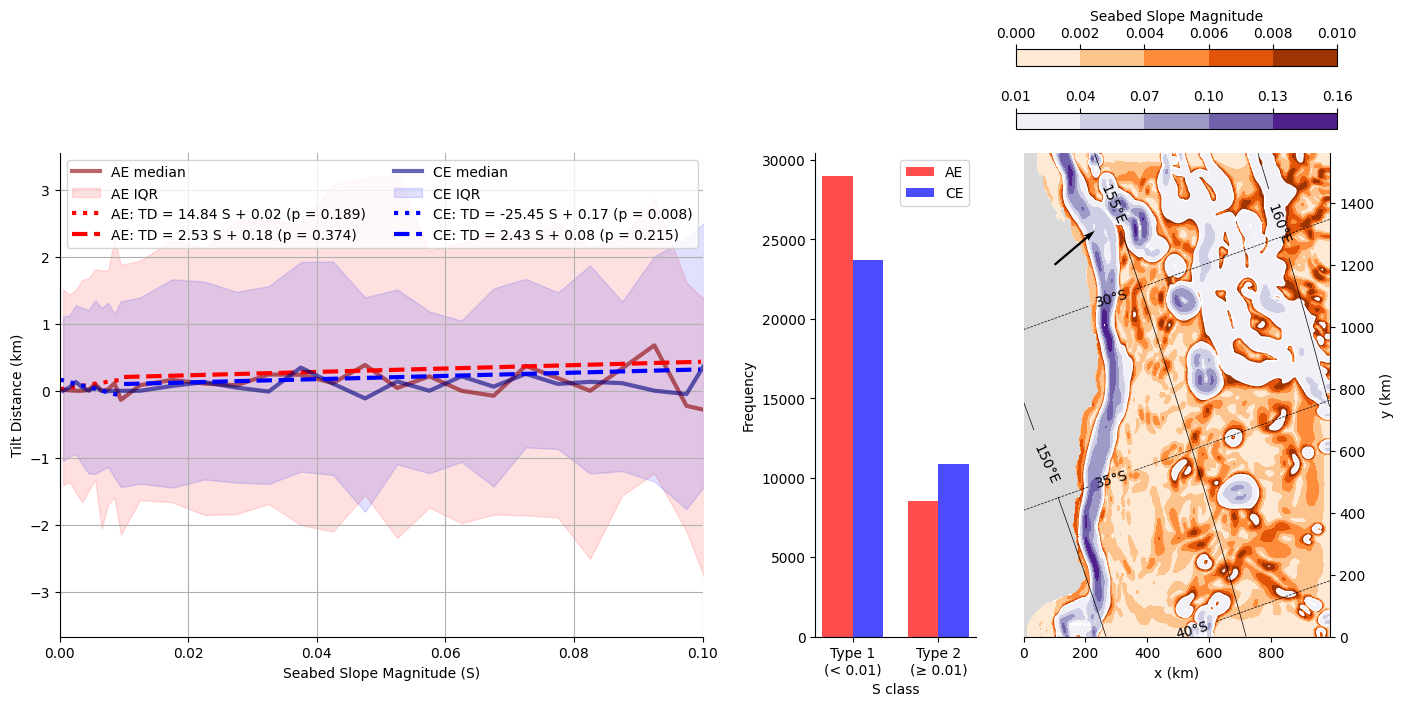

In [22]:
fig, (ax, ax_hist, ax2) = plt.subplots(
    1, 3, figsize=(14, 7),
    gridspec_kw={'width_ratios': [2, .5, 1]},
    constrained_layout=True
)

styles = {
    'AE': {'line': 'darkred',  'fill': 'red'},
    'CE': {'line': 'navy', 'fill': 'blue'}
}

df = df_eddies.copy()
w = df.s

split_s = 0.01

int1, int2 = 0.001, 0.005
bins = np.concatenate([
    np.arange(w.min(), split_s, int1),
    np.arange(split_s, .1 + int2, int2)
])
bin_centers = 0.5 * (bins[:-1] + bins[1:])

slope_AE = []
slope_CE = []

for cyc in ['AE', 'CE']:
    df_masked = df_eddies[df_eddies.Cyc == cyc].copy()
    df_masked = df_masked.dropna(subset=['s', 'diff_TDis'])

    slope_val = df_masked['s'].values
    tilt = df_masked['diff_TDis'].values

    if cyc == 'AE':
        slope_AE.append(slope_val)
    else:
        slope_CE.append(slope_val)

    df_masked['bin'] = pd.cut(df_masked.s, bins=bins, include_lowest=True)
    grouped = df_masked.groupby('bin', observed=False).diff_TDis

    median = grouped.median().values
    q25 = grouped.quantile(0.25).values
    q75 = grouped.quantile(0.75).values

    # ax.scatter(slope_val, tilt,
    #        s=1, alpha=0.1, marker='.', color=styles[cyc]['fill'])

    ax.plot(bin_centers, median, lw=3, alpha=.6,
            color=styles[cyc]['line'], label=f'{cyc} median')
    ax.fill_between(bin_centers, q25, q75,
                    color=styles[cyc]['fill'], alpha=0.12,
                    label=f'{cyc} IQR')

    mask_left = slope_val < split_s
    if mask_left.sum() > 2:
        m1, c1, r1, p1, se1 = linregress(slope_val[mask_left], tilt[mask_left])
        x1 = np.linspace(slope_val[mask_left].min(), slope_val[mask_left].max(), 200)
        y1 = m1 * x1 + c1
        eq_str = f'TD = {m1:.2f} S + {c1:.2f}' if c1 >= 0 else f'TD = {m1:.2f} S - {abs(c1):.2f}'
        p_str  = 'p<0.001' if p1 < 0.001 else f'p = {p1:.3f}'
        ax.plot(x1, y1, ':', lw=3, color=styles[cyc]['fill'],
                label=f'{cyc}: {eq_str} ({p_str})')

    mask_right = (slope_val >= split_s) & (slope_val <= .1)
    if mask_right.sum() > 2:
        m2, c2, r2, p2, se2 = linregress(slope_val[mask_right], tilt[mask_right])
        x2 = np.linspace(slope_val[mask_right].min(), slope_val[mask_right].max(), 200)
        y2 = m2 * x2 + c2
        eq_str = f'TD = {m2:.2f} S + {c2:.2f}' if c2 >= 0 else f'TD = {m2:.2f} S - {abs(c2):.2f}'
        p_str  = 'p<0.001' if p2 < 0.001 else f'p = {p2:.3f}'
        ax.plot(x2, y2, '--', lw=3, color=styles[cyc]['fill'],
                label=f'{cyc}: {eq_str} ({p_str})')

slope_AE = np.concatenate(slope_AE) if slope_AE else np.array([])
slope_CE = np.concatenate(slope_CE) if slope_CE else np.array([])

# ax.text(0.005, 10, f'Type 1\n(< {split_s})')
# ax.text(.04, 35, f'Type 2\n(≥ {split_s})')

ax.set_xlim(0, .1)
# ax.set_ylim(0, 60)
ax.set_xlabel('Seabed Slope Magnitude (S)')
ax.set_ylabel('Tilt Distance (km)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left', ncol=2)
ax.grid(True)

ax2.contourf(X_grid, Y_grid, np.where(mask_rho, np.nan, 1), cmap='Greys')
s_mask = np.where(mask_rho, s, np.nan)
cf = ax2.contourf(X_grid, Y_grid, np.where(s_mask > split_s, np.nan, s_mask), cmap='Oranges', levels=np.linspace(0, .01, 6))
cbar = fig.colorbar(cf, ax=ax2, location='top')
cbar.set_label('Seabed Slope Magnitude')
cf = ax2.contourf(X_grid, Y_grid, np.where(s_mask < split_s, np.nan, s_mask), cmap='Purples', levels=np.linspace(0.01, .16, 6))
cbar = fig.colorbar(cf, ax=ax2, location='top')
# cbar.set_label('Seabed Slope Magnitude')
ax2.contour(X_grid, Y_grid, s, levels=[split_s], colors=['w'], linewidths=1)

c1 = ax2.contour(X_grid, Y_grid, lat_rho, levels=levels_lat,
                colors='k', linewidths=0.5)
ax.clabel(c1, fmt=lambda v: f"{-v:.0f}°S", inline=True, colors='k')
c2 = ax2.contour(X_grid, Y_grid, lon_rho, levels=levels_lon,
                colors='k', linewidths=0.5)
ax.clabel(c2, fmt=lambda v: f"{v:.0f}°E", inline=True, colors='k')

# ax2.text(300, 300, f'Type 1\n(< {split_s})')
# ax2.text(20, 1100, f'Type 2\n(≥ {split_s})')
x0, y0 = 100, 1200
x1, y1 = 230, 1310
ax2.quiver(x0, y0, x1 - x0, y1 - y0, angles='xy', scale_units='xy', scale=1, zorder=5)

ax2.set_aspect('equal', adjustable='box')
ax2.set_xlabel('x (km)')
ax2.set_ylabel('y (km)')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# -----------------------------
# middle panel: Type 1 / Type 2 bar plot (AE / CE)
# Type 1: S < split_s
# Type 2: S >= split_s
# -----------------------------
type1_AE = np.sum(slope_AE < split_s)
type2_AE = np.sum(slope_AE >= split_s)
type1_CE = np.sum(slope_CE < split_s)
type2_CE = np.sum(slope_CE >= split_s)

x = np.arange(2)
width = 0.35

ax_hist.bar(x - width/2, [type1_AE, type2_AE],
            width=width, label='AE',
            alpha=0.7, color=styles['AE']['fill'])
ax_hist.bar(x + width/2, [type1_CE, type2_CE],
            width=width, label='CE',
            alpha=0.7, color=styles['CE']['fill'])

ax_hist.set_xticks(x)
ax_hist.set_xticklabels([f'Type 1\n(< {split_s})', f'Type 2\n(≥ {split_s})'])
ax_hist.set_ylabel('Frequency')
ax_hist.set_xlabel('S class')
ax_hist.spines['top'].set_visible(False)
ax_hist.spines['right'].set_visible(False)
ax_hist.legend(loc='upper right')

plt.show()


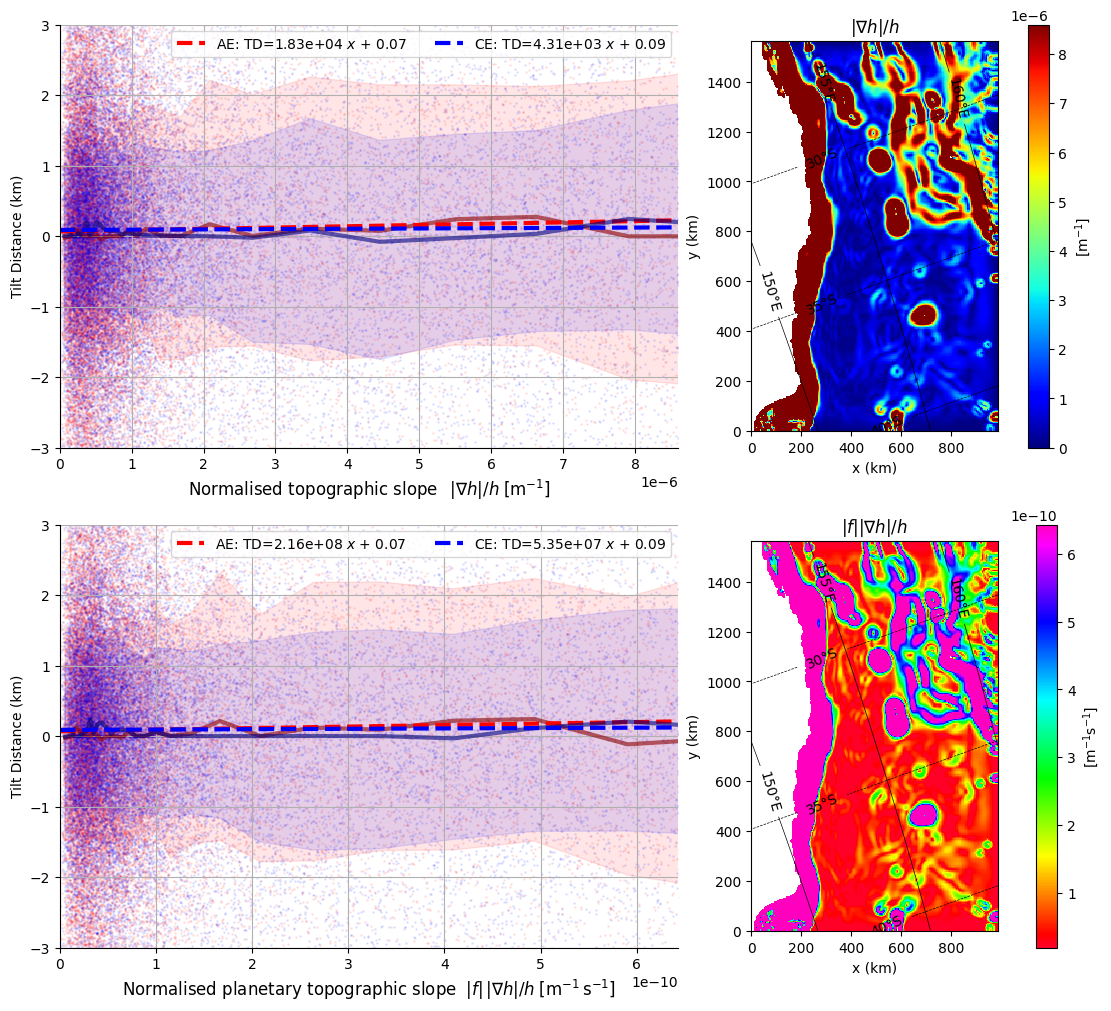

In [30]:
df_eddies['s_norm']   = df_eddies.s / df_eddies.h
df_eddies['s_norm_f'] = df_eddies.f.abs() * df_eddies.s / df_eddies.h

fig = plt.figure(figsize=(11, 10), constrained_layout=True)
gs = fig.add_gridspec(2, 2, width_ratios=[2.5, 1.0], hspace=0.0, wspace=0.0)

axs_L = [fig.add_subplot(gs[i, 0]) for i in range(2)]
axs_R = [fig.add_subplot(gs[i, 1]) for i in range(2)]

styles = {
    'AE': {'line': 'darkred', 'fill': 'red'},
    'CE': {'line': 'navy',    'fill': 'blue'}
}

def panel(ax, xcol, xlabel, legend_key, xlim=None, split=None, reg_hi_override=None, scatter=False):
    df_all = df_eddies.dropna(subset=[xcol])
    x_min, x_max = df_all[xcol].min(), df_all[xcol].max()

    nbins = 30
    bins = np.unique(np.quantile(df_all[xcol], np.linspace(0, 1, nbins + 1)))
    bin_centers = 0.5 * (bins[:-1] + bins[1:])

    for cyc in ['AE', 'CE']:
        dfm = df_eddies[df_eddies.Cyc == cyc].dropna(subset=[xcol, 'diff_TDis'])
        xval = dfm[xcol].values
        tilt = dfm['diff_TDis'].values

        mask = (xval >= x_min) & (xval <= x_max)
        xval, tilt = xval[mask], tilt[mask]

        d = np.digitize(xval, bins)
        med = [np.nanmedian(tilt[d == i]) for i in range(1, len(bins))]
        q25 = [np.nanquantile(tilt[d == i], .25) for i in range(1, len(bins))]
        q75 = [np.nanquantile(tilt[d == i], .75) for i in range(1, len(bins))]

        if scatter:
            ax.scatter(xval, tilt, s=1, alpha=0.08, color=styles[cyc]['fill'])

        ax.plot(bin_centers, med, lw=3, color=styles[cyc]['line'], alpha=.6)
        ax.fill_between(bin_centers, q25, q75, color=styles[cyc]['fill'], alpha=0.10)

        if split is None:
            m, c, *_ = linregress(xval, tilt)
            xf = np.linspace(xval.min(), xval.max(), 200)
            ax.plot(
                xf, m*xf + c, '--', lw=3, color=styles[cyc]['fill'],
                label=fr'{cyc}: TD={m:.2e} {legend_key} {"$-$" if c<0 else "$+$"} {abs(c):.2f}'
            )
        else:
            lo, hi = np.nanpercentile(df_eddies[xcol], [10, 90])
            hi2 = reg_hi_override if reg_hi_override is not None else hi
            for l, (a, b) in enumerate(zip([lo, split], [split, hi2])):
                mask = (xval >= a) & (xval <= b)
                if mask.sum() > 2:
                    m, c, *_ = linregress(xval[mask], tilt[mask])
                    xf = np.linspace(a, b, 200)
                    ax.plot(
                        xf, m*xf + c, ':' if l == 0 else '--',
                        lw=3, color=styles[cyc]['fill'],
                        label=fr'{cyc}: TD={m:.2e} {legend_key} {"$-$" if c<0 else "$+$"} {abs(c):.2f}'
                    )

    # ax.set_ylim(0, 55)
    if xlim is None:
        ax.set_xlim(*np.nanpercentile(df_eddies[xcol], [10, 90]))
    else:
        ax.set_xlim(*xlim)

    ax.legend(loc='upper right', ncol=2)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Tilt Distance (km)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


# =========================
# LEFT COLUMN — TD PANELS
# =========================
lo, hi = np.nanpercentile(df_eddies.s_norm, [10, 90])
panel(
    axs_L[0],
    's_norm',
    r'Normalised topographic slope $\; \,|\nabla h|/h \; [\mathrm{m^{-1}}]$',
    # r'$\frac{|\nabla h|}{h}$',
    '$x$',
    # split=2e-6,
    xlim=(0, hi),
    scatter=True
)
axs_L[0].set_ylim(-3, 3)
axs_L[0].grid(True)

lo, hi = np.nanpercentile(df_eddies.s_norm_f, [10, 90])
panel(
    axs_L[1],
    's_norm_f',
    r'Normalised planetary topographic slope $\; |f|\,|\nabla h|/h \; [\mathrm{m^{-1}\,s^{-1}}]$',
    # r'$\frac{f|\nabla h|}{h}$',
    '$x$',
    # split=1.5e-10,
    # split=3.5e-10,
    xlim=(0, hi),
    scatter=True
)
axs_L[1].set_ylim(-3, 3)
axs_L[1].grid(True)

# =========================
# RIGHT COLUMN — MAPS
# =========================
s_norm = s / h
lo, hi = np.nanpercentile(df_eddies.s_norm, [10, 90])
pc = axs_R[0].pcolor(X_grid, Y_grid, s_norm, vmin=0, vmax=hi, cmap='jet')
fig.colorbar(pc, ax=axs_R[0], label=r'[m$^{-1}$]')
axs_R[0].set_title(r'$|\nabla h|/h$')

s_norm_f = abs(f) * s / h
lo, hi = np.nanpercentile(df_eddies.s_norm_f, [10, 90])
pc = axs_R[1].pcolor(X_grid, Y_grid, s_norm_f, vmin=lo, vmax=hi, cmap='gist_rainbow')
fig.colorbar(pc, ax=axs_R[1], label=r'[m$^{-1}$s$^{-1}$]')
axs_R[1].set_title(r'$|f||\nabla h|/h$')

for ax in axs_R:
    c1 = ax.contour(X_grid, Y_grid, lat_rho, levels=levels_lat, colors='k', linewidths=.5)
    ax.clabel(c1, fmt=lambda v: f"{-v:.0f}°S", inline=True, colors='k')
    c2 = ax.contour(X_grid, Y_grid, lon_rho, levels=levels_lon, colors='k', linewidths=.5)
    ax.clabel(c2, fmt=lambda v: f"{v:.0f}°E", inline=True, colors='k')
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (km)'); ax.set_ylabel('y (km)')

plt.show()
